# Exploration of electricity and weather data 

#### Key points
1. Trend through time (year, month, week, day, hour)
2. Minimum and maximum of consumption per time frame
3. Correlations between variables:
      - Consumption vs. time of year
      - Consumptions vs. weather 

## 1. Hourly Electricity Consumption

In [13]:
# Import libraries for plotting, reading and wrangling data
library(ggplot2)
library(cowplot)
library(gridExtra)
library(readr)
library(dplyr)
library(grid)

In [14]:
# Read hourly electricity consumption data in csv file
ElecHourDF <- read_csv("../../curated/electricity/gold_hourly_electricity.csv",    show_col_types = FALSE)

In [15]:
# Define average consumption and outliers
avg_hour_consumption <- mean(ElecHourDF$consumption)
ElecHourDF <- mutate(ElecHourDF, isOutlier = consumption > quantile(consumption, 0.95))

### a) Consumption by day and hour

In [16]:
# Create function that filters by time values and calculate an instant by day
viz_prep_func <- function(df, pyear, pmonth, pday1, pday2) {
    WeekDF <- df %>%
        filter(year == pyear, month == pmonth, day > pday1, day <= pday2) %>%
        mutate(
            time = format(strptime(hour, format="%H"), format = "%H:00"),
            date_time = paste0(date, " ", time),
            unix_ts = as.numeric(as.POSIXct(date_time)),
            instant = (unix_ts - min(unix_ts)) / (24 * 3600)
        ) %>%
        select(-c(time, date_time, unix_ts))

    return(WeekDF)
}

# Paramaters
year <- 2013
month <- 01

# Calculate four weeks dataframes
ElecDayHourWeekOneDF    <- viz_prep_func(ElecHourDF, year, month, 0, 7)
ElecDayHourWeekTwoDF    <- viz_prep_func(ElecHourDF, year, month, 7, 14)
ElecDayHourWeekThreeDF  <- viz_prep_func(ElecHourDF, year, month, 14, 21)
ElecDayHourWeekFourDF   <- viz_prep_func(ElecHourDF, year, month, 21, 28)

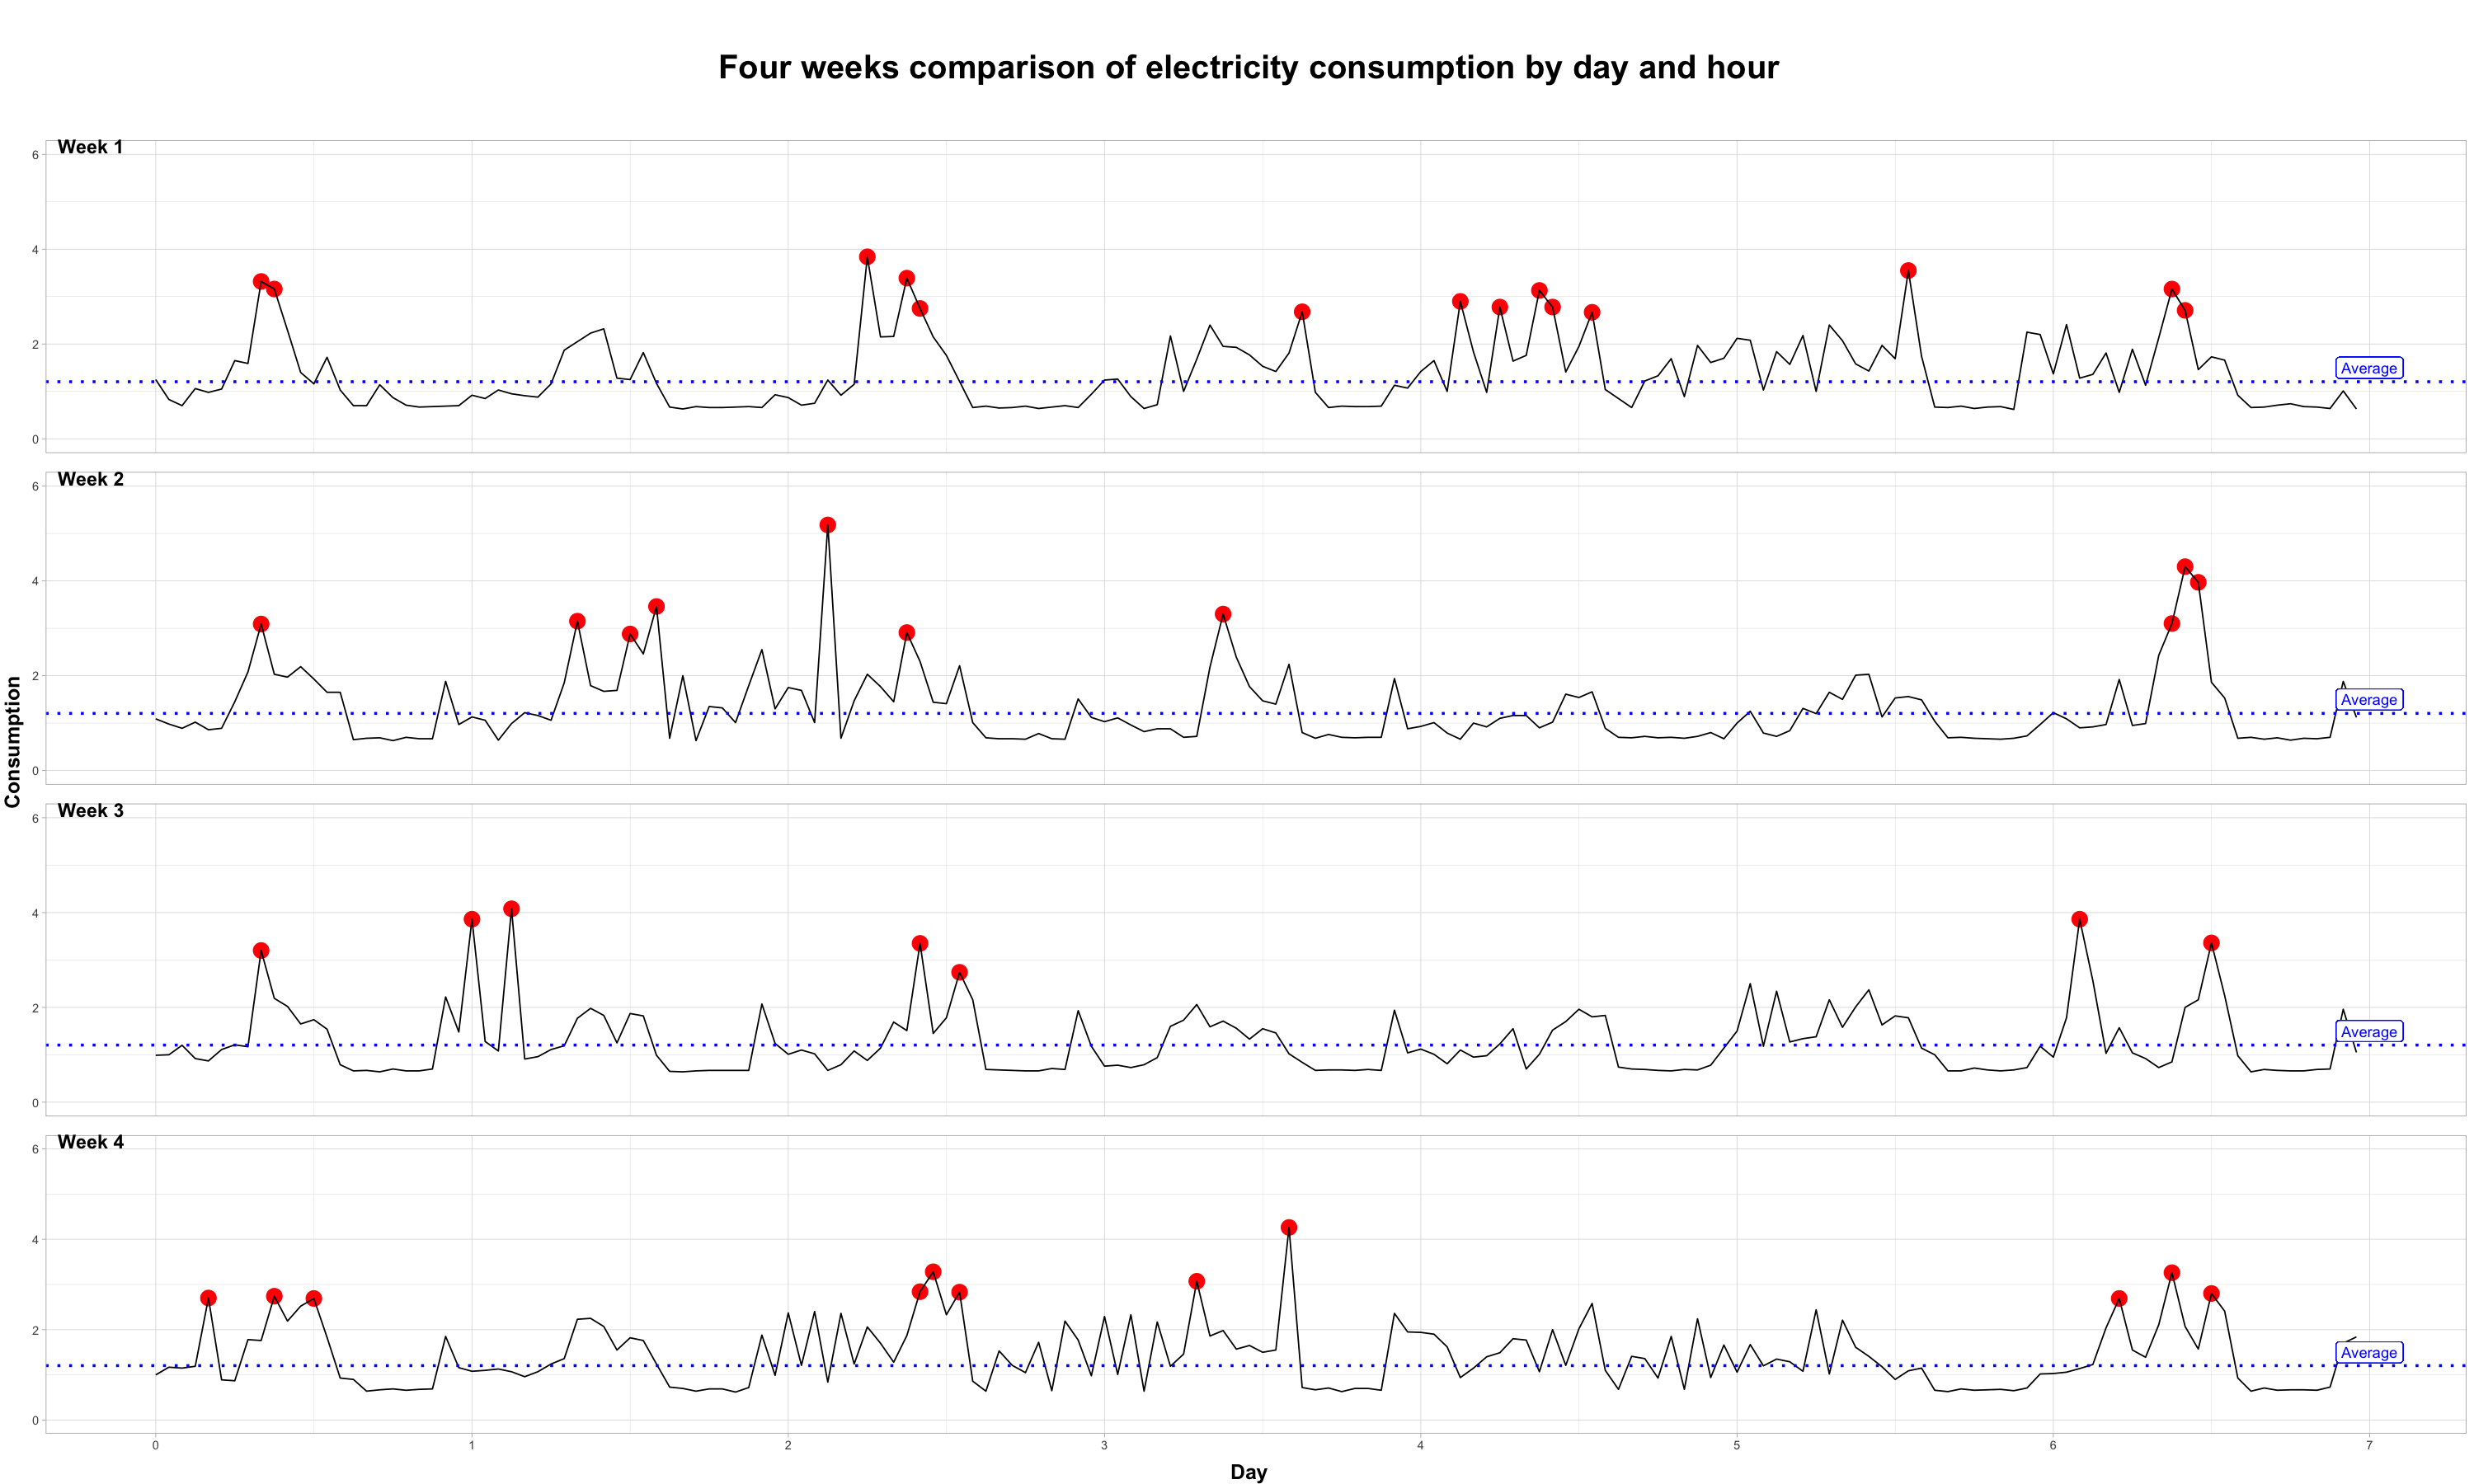

In [20]:
# Visualization of electricity consumption per day and hour
# Set configuration for plot size
options(repr.plot.width = 25, repr.plot.height = 15)

# Outliers characteritics
# Week 1
outliers_size_wk1   <- ifelse(ElecDayHourWeekOneDF$isOutlier    == TRUE, 5, 1)
outliers_alpha_wk1  <- ifelse(ElecDayHourWeekOneDF$isOutlier    == TRUE, 1, 0)
outliers_color_wk1  <- ifelse(ElecDayHourWeekOneDF$isOutlier    == TRUE, "red", "black")
# Week 2
outliers_size_wk2   <- ifelse(ElecDayHourWeekTwoDF$isOutlier    == TRUE, 5, 1)
outliers_alpha_wk2  <- ifelse(ElecDayHourWeekTwoDF$isOutlier    == TRUE, 1, 0)
outliers_color_wk2  <- ifelse(ElecDayHourWeekTwoDF$isOutlier    == TRUE, "red", "black")
# Week 3
outliers_size_wk3   <- ifelse(ElecDayHourWeekThreeDF$isOutlier  == TRUE, 5, 1)
outliers_alpha_wk3  <- ifelse(ElecDayHourWeekThreeDF$isOutlier  == TRUE, 1, 0)
outliers_color_wk3  <- ifelse(ElecDayHourWeekThreeDF$isOutlier  == TRUE, "red", "black")
# Week 4
outliers_size_wk4   <- ifelse(ElecDayHourWeekFourDF$isOutlier   == TRUE, 5, 1)
outliers_alpha_wk4  <- ifelse(ElecDayHourWeekFourDF$isOutlier   == TRUE, 1, 0)
outliers_color_wk4  <- ifelse(ElecDayHourWeekFourDF$isOutlier   == TRUE, "red", "black")  

# Plot definitions
plt_wk1    <- ggplot(ElecDayHourWeekOneDF,    aes(x = instant, y = consumption)) + 
                geom_point(alpha = outliers_alpha_wk1, size = outliers_size_wk1, color = outliers_color_wk1) + 
                geom_line()  + 
                scale_x_continuous(breaks = 0:7, labels = 0:7) + theme_light()
plt_wk2    <- ggplot(ElecDayHourWeekTwoDF,    aes(x = instant, y = consumption)) + 
                geom_point(alpha = outliers_alpha_wk2, size = outliers_size_wk2, color = outliers_color_wk2) + 
                geom_line()  + 
                scale_x_continuous(breaks = 0:7, labels = 0:7) + theme_light()
plt_wk3    <- ggplot(ElecDayHourWeekThreeDF,    aes(x = instant, y = consumption)) + 
                geom_point(alpha = outliers_alpha_wk3, size = outliers_size_wk3, color = outliers_color_wk3) + 
                geom_line()  + 
                scale_x_continuous(breaks = 0:7, labels = 0:7) + theme_light()
plt_wk4    <- ggplot(ElecDayHourWeekFourDF,    aes(x = instant, y = consumption)) + 
                geom_point(alpha = outliers_alpha_wk4, size = outliers_size_wk4, color = outliers_color_wk4) + 
                geom_line()  + 
                scale_x_continuous(breaks = 0:7, labels = 0:7) + theme_light()

# Grid of plots definition
grid_1 <- plot_grid(
    plt_wk1 + ylim(0, 6) + geom_hline(yintercept = avg_hour_consumption, color = "blue", linetype = "dotted", size = 1) + 
        theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.title.x = element_blank(), axis.title.y = element_blank()) + geom_label(label = "Average", x = 7, y = 1.5, color = "blue"), 
    plt_wk2 + ylim(0, 6) + geom_hline(yintercept = avg_hour_consumption, color = "blue", linetype = "dotted", size = 1) + 
        theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.title.x = element_blank(), axis.title.y = element_blank()) + geom_label(label = "Average", x = 7, y = 1.5, color = "blue"),
    plt_wk3 + ylim(0, 6) + geom_hline(yintercept = avg_hour_consumption, color = "blue", linetype = "dotted", size = 1) + 
        theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.title.x = element_blank(), axis.title.y = element_blank()) + geom_label(label = "Average", x = 7, y = 1.5, color = "blue"),
    plt_wk4 + ylim(0, 6) + geom_hline(yintercept = avg_hour_consumption, color = "blue", linetype = "dotted", size = 1) +
        theme(axis.title.x = element_blank(), axis.title.y = element_blank()) + geom_label(label = "Average", x = 7, y = 1.5, color = "blue"),
    labels = c("Week 1", "Week 2", "Week 3", "Week 4"),
    label_y = 1,
    ncol = 1, nrow = 4
)
# Titles definition
title <- ggdraw() + draw_label("Four weeks comparison of electricity consumption by day and hour", fontface = "bold", size = 24)
x_title  <- textGrob("Day", gp = gpar(fontface="bold", col="black", fontsize = 15))
y_title  <- textGrob("Consumption", gp = gpar(fontface="bold", col="black", fontsize = 15), rot=90)
plot     <- plot_grid(title, grid_1, ncol = 1, rel_heights = c(0.1, 1))

grid.arrange(arrangeGrob(plot, bottom = x_title, left = y_title))

### b) Consumption by hour

##### Plot 1

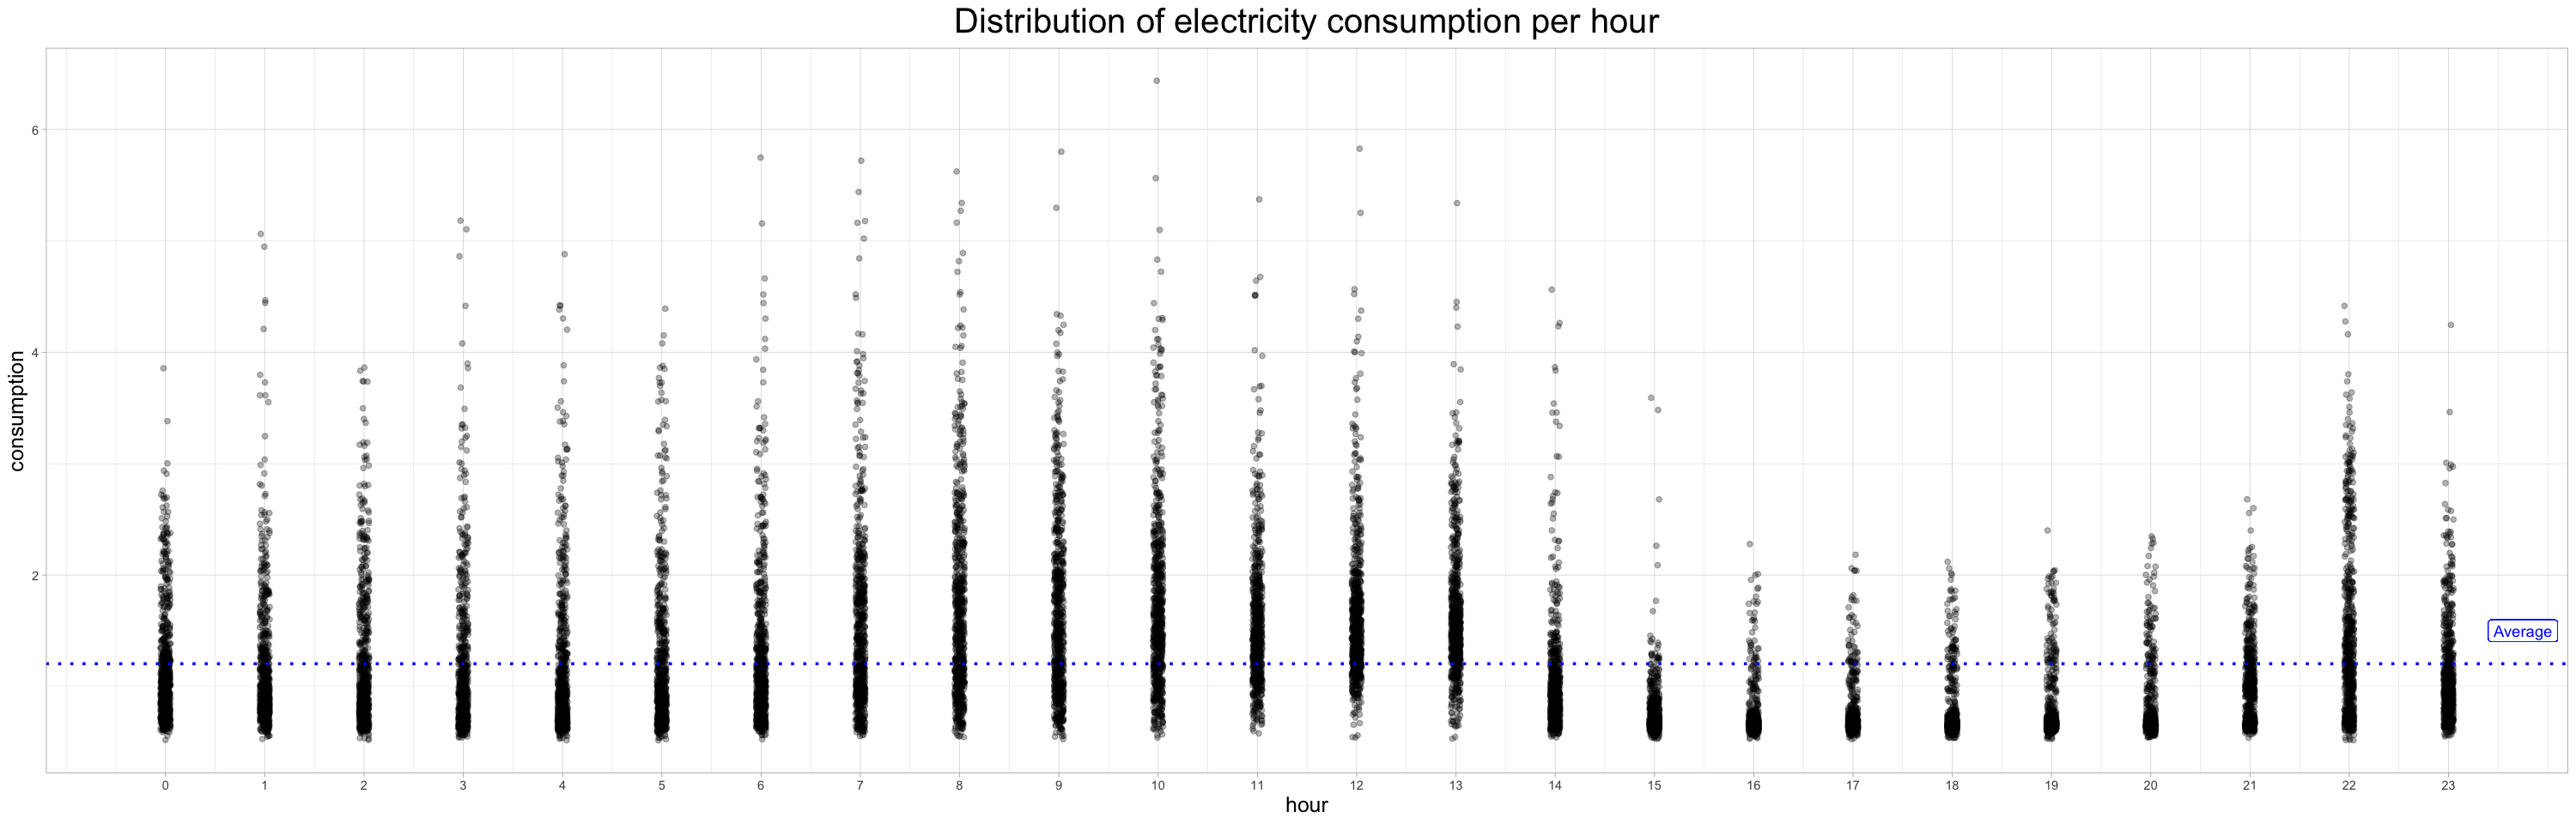

In [26]:
# Set configuration for plot size
options(repr.plot.width = 25, repr.plot.height = 8)

ggplot(ElecHourDF, aes(x = hour, y = consumption)) + 
    geom_jitter(alpha = 0.3, width = 0.05) + 
    geom_hline(yintercept = avg_hour_consumption, color = "blue", linetype = "dotted", size = 1) +
    scale_x_continuous(breaks = 0:23, labels = 0:23) + 
    ggtitle("Distribution of electricity consumption per hour") + 
    geom_label(label = "Average", x = 23.75, y = 1.5, color = "blue") +
    theme_light() +
    theme(
        plot.title = element_text(hjust = 0.5, size = 24),
        axis.title.x = element_text(size = 15),
        axis.title.y = element_text(size = 15)
    )

##### Plot 2

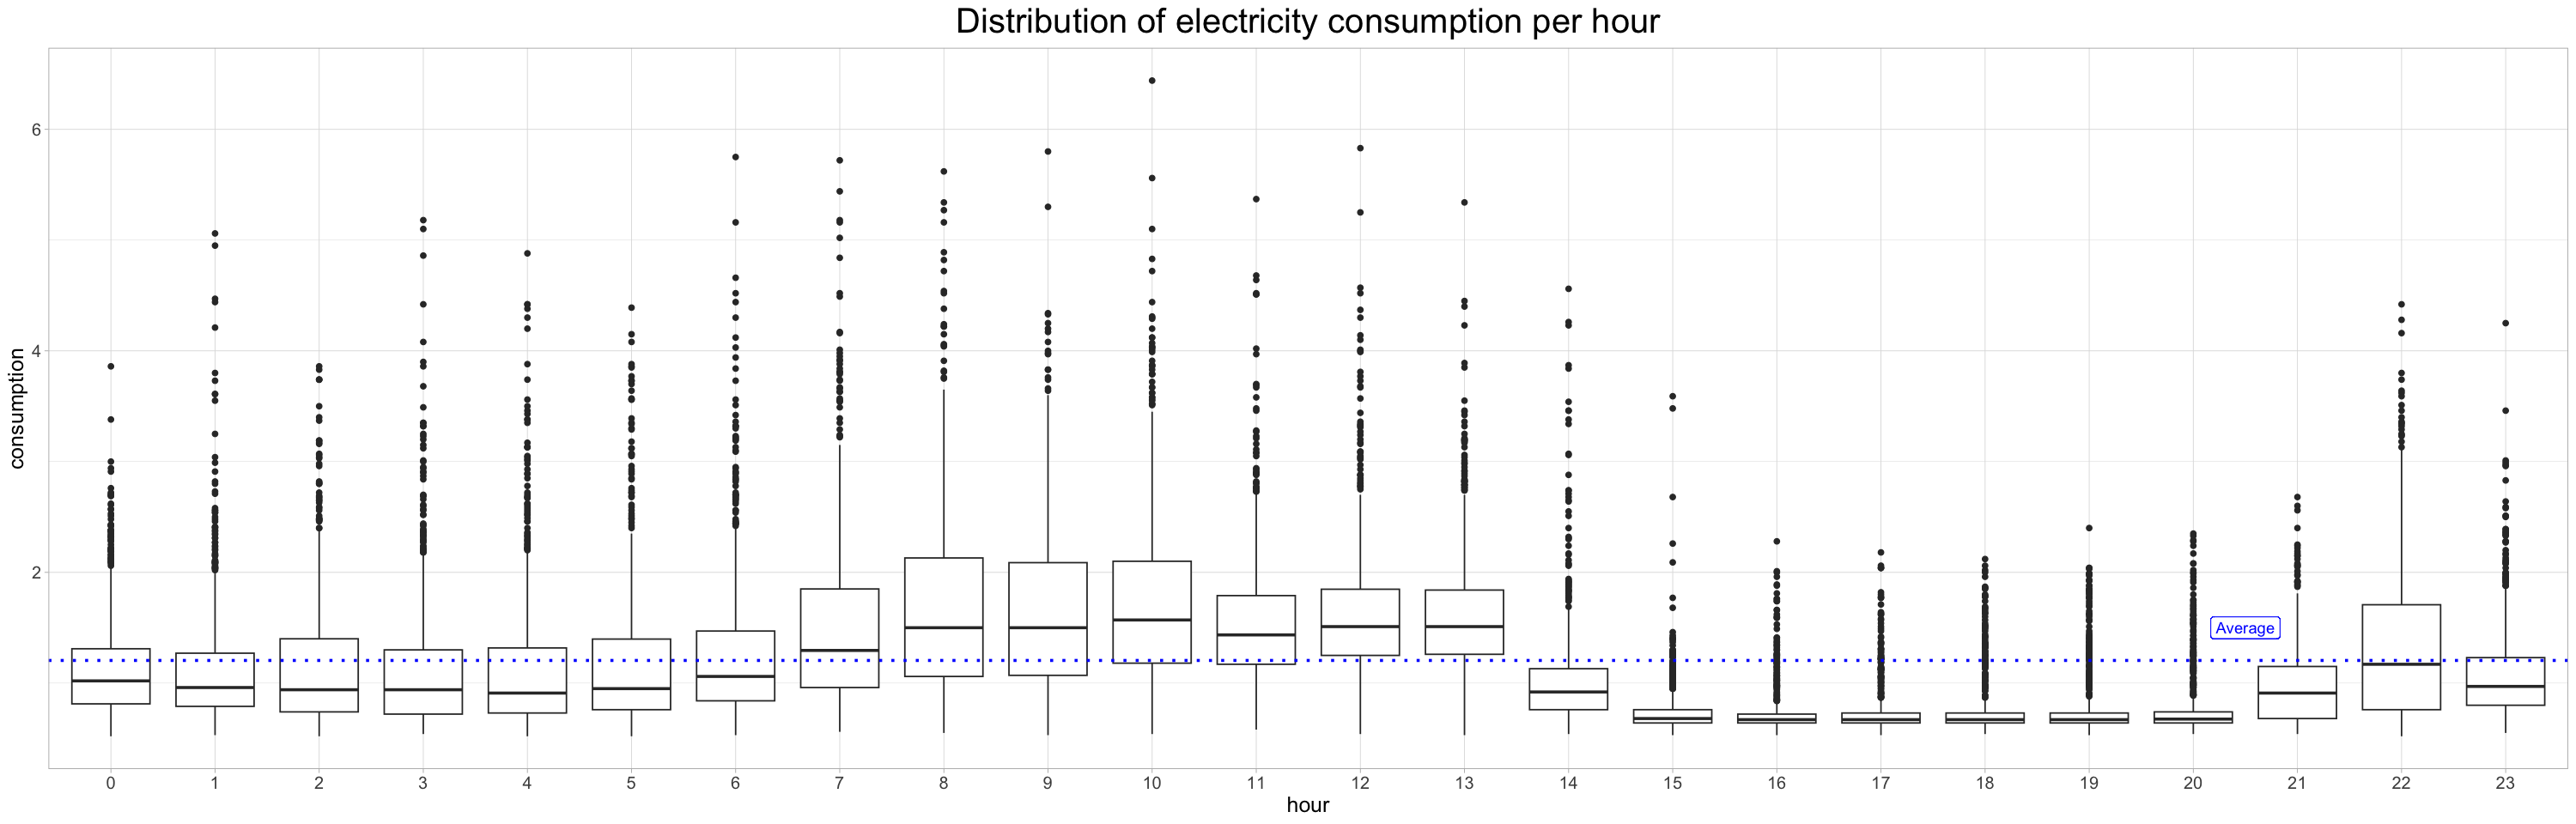

In [29]:
# Set configuration for plot size
options(repr.plot.width = 25, repr.plot.height = 8)
ggplot(ElecHourDF, aes(x = hour, y = consumption)) + 
    geom_boxplot(aes(x = factor(hour))) + 
    geom_hline(yintercept = avg_hour_consumption, color = "blue", linetype = "dotted", size = 1) +
    ggtitle("Distribution of electricity consumption per hour") + 
    geom_label(label = "Average", x = 21.5, y = 1.5, color = "blue") +
    theme_light() +
    theme(
        plot.title = element_text(hjust = 0.5, size = 24),
        axis.title.x = element_text(size = 15),
        axis.title.y = element_text(size = 15),
        axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12)
    )